In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from model import load_data,  handle_missing_data, feature_engineering, prepare_data, evaluate_model, analyze_feature_importance_lime, analyze_feature_importance_shap



In [3]:
# Load Data
file_path ='../MachineLearningRating_v3.csv'
data = load_data(file_path)

In [4]:
# Handle Missing Data
data = handle_missing_data(data)
print(data.isnull().sum())

c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\model.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\model.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

In [5]:
# Feature Engineering
data = feature_engineering(data)
print(data.head())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ... CoverCategory   CoverType            CoverGroup  \
0  Current account  ...    Windscreen  Windscre

In [6]:
# Prepare Data
X_train, X_test, y_train, y_test = prepare_data(data)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\model.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\model.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

(700068, 2058) (300030, 2058) (700068,) (300030,)


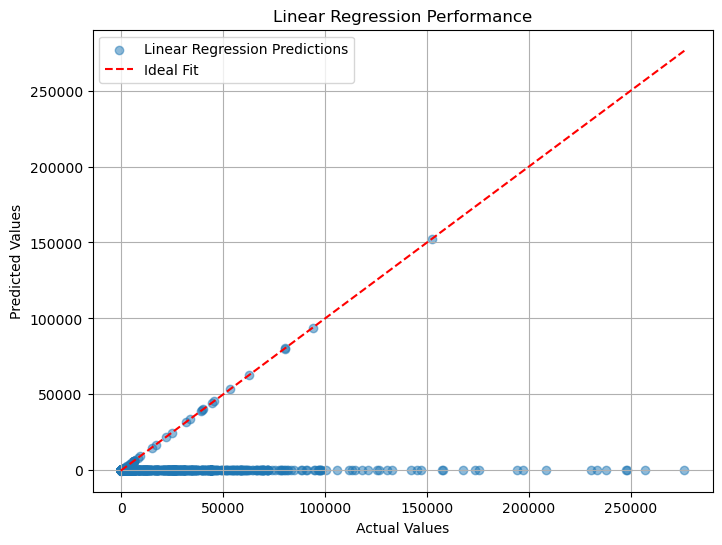

Linear Regression - MSE: 5196982.216187764, R2: 0.03990726606372108, Accuracy: 0.5558477485584775, Precision: 0.0034286142996473854, Recall: 0.5175537938844847, F1: 0.006812100795241964


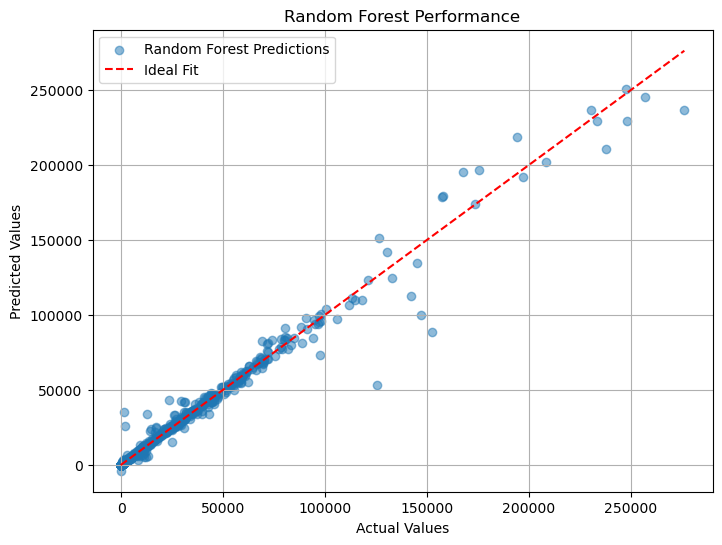

Random Forest - MSE: 84716.88135973399, R2: 0.9843493668341073, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


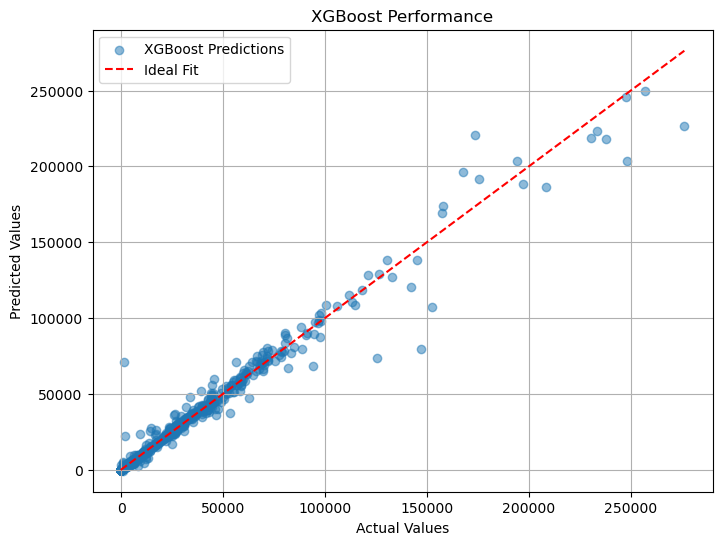

XGBoost - MSE: 103124.4173272099, R2: 0.9809487507078878, Accuracy: 0.9999766689997667, Precision: 0.9977272727272727, Recall: 0.9943374858437146, F1: 0.9960294951786727


In [9]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}
results = {}
for model_name, model in models.items():
    mse, r2, accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    results[model_name] = {
        "MSE": mse,
        "R2": r2,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }
    print(f"{model_name} - MSE: {mse}, R2: {r2}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


In [11]:
# Create a DataFrame to display the results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE        R2  Accuracy  Precision    Recall  \
Linear Regression  5.196982e+06  0.039907  0.555848   0.003429  0.517554   
Random Forest      8.471688e+04  0.984349  1.000000   1.000000  1.000000   
XGBoost            1.031244e+05  0.980949  0.999977   0.997727  0.994337   

                         F1  
Linear Regression  0.006812  
Random Forest      1.000000  
XGBoost            0.996029  


In [19]:

import numpy as np
import lime
import lime.lime_tabular
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
print(f"Analyzing feature importance for the best model: {best_model_name}")

# Feature Importance Analysis using LIME
def analyze_feature_importance_lime(model, X_train, X_test, feature_names):
    """
    Analyze feature importance using LIME.
    """
    # Ensure X_train and X_test are NumPy arrays
    if not isinstance(X_train, np.ndarray):
        X_train = X_train.toarray() if hasattr(X_train, 'toarray') else np.array(X_train)
    if not isinstance(X_test, np.ndarray):
        X_test = X_test.toarray() if hasattr(X_test, 'toarray') else np.array(X_test)

    explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='regression', feature_names=feature_names)
    i = np.random.randint(0, X_test.shape[0])
    exp = explainer.explain_instance(X_test[i], model.predict, num_features=10)
    exp.show_in_notebook(show_table=True)


Analyzing feature importance for the best model: Random Forest


In [23]:
# Analyze feature importance for the best model (e.g., XGBoost)
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
print(f"Analyzing feature importance for the best model: {best_model_name}")


Analyzing feature importance for the best model: Random Forest


In [31]:
# Report comparison between each model performance.
print(results_df)


                            MSE        R2  Accuracy  Precision    Recall  \
Linear Regression  5.196982e+06  0.039907  0.555848   0.003429  0.517554   
Random Forest      8.471688e+04  0.984349  1.000000   1.000000  1.000000   
XGBoost            1.031244e+05  0.980949  0.999977   0.997727  0.994337   

                         F1  
Linear Regression  0.006812  
Random Forest      1.000000  
XGBoost            0.996029  
